In [14]:
#@title Run this cell to download some files :)
!wget https://www.dropbox.com/sh/snnkqab5at1zpbh/AAB5cvHj0txkIAG01JmOUhY4a > /dev/null 2>&1
!unzip -o AAB5cvHj0txkIAG01JmOUhY4a > /dev/null 2>&1

In [13]:
#@title Run this cell to load some code!
import ttt
import c4
from IPython.display import Image

RED_PLAYER = 0
GREEN_PLAYER = 1

def is_red_player(p):
    return p == 0


# Game playing artificial intelligence: minimax and its variants

Playing games is one of the best things to do with friends; winning is even better. Today we'll look at how AI agents can learn to play games and outsmart us at our own games! Here's a timeline of AI's progress in playing games. 

![](https://miro.medium.com/max/3200/0*bGZpYurIFPktS77p.)

The defeat of Lee Sedol by AlphaGo sent shockwaves through the world. A harsh reality hit that we humans could be defeated in a game such as go that depends so much on intuition and long term strategy - it was only a matter of time before AI outperformed humans on tasks thought to be distinctly human. Was there even a point in being a professional Go player just to get beaten by an AI? Luckily, The human champion took the defeat gracefully, and now AlphaGo and related algorithms are used as teaching tools at Go academies, revealing previously undiscovered strategies. Optimistially, such AI could be used together with human intelligence to create great positive impact on the world.

Today we'll look at some game playing AI. We'll use tic tac toe and connect 4 as our examples!

**Discuss:** At this point you all have been exposed to many techniques and algorithms in AI, drawing upon this knowledge, how would you train an AI to play a game like chess?

Throughout this notebook, we'll be using tic-tac-toe, and Connect 4 as our running examples of games! Before we start, let's play a bit!

In [3]:
ttt.ttt(ttt.human_player, ttt.human_player)

x	-	o	
o	x	x	
-	o	x	
The winner is player 0!


In [4]:
c4.c4(c4.human_player, c4.human_player)

Player 0 is x's and Player 1 is o's

Good luck!! 

-   -   -   -   -   -   -   

-   -   -   -   -   -   -   

-   -   -   -   -   -   -   

-   -   -   -   -   -   -   

-   -   -   -   -   -   -   

-   -   -   -   -   -   -   

-   -   -   -   -   -   -   

0   1   2   3   4   5   6   
It is Player 0's turn


NameError: ignored

Let's also play against the AI that we'll design as a preview!

In [5]:
ttt.ttt(ttt.human_player, ttt.minimax_player)

Player 0 is x's and Player 1 is o's
Enter you move 0-indexed! 
Good luck!! 

-	-	-	
-	-	-	
-	-	-	
It is Player 0's turn


NameError: ignored

In [12]:
c4.c4(c4.human_player, c4.get_minimax_player(c4.preset_score))

Player 0 is x's and Player 1 is o's

Good luck!! 

-   -   -   -   -   -   -   

-   -   -   -   -   -   -   

-   -   -   -   -   -   -   

-   -   -   -   -   -   -   

-   -   -   -   -   -   -   

-   -   -   -   -   -   -   

-   -   -   -   -   -   -   

0   1   2   3   4   5   6   
It is Player 0's turn


NameError: ignored

## Comparison to Reinforcement Learning

Here is the RL paradigm. As a reminder, we have 

* states - what does the world look like right now and where am I in relation to it?
* actions - what can I do next?
* rewards - what do I get for being at a certain state?

**Discuss:** What are the similarities and differences between this paradigm and the two player game paradigm?

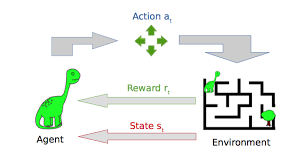

## The pesky adversary

Unlike many applications of RL, where we interact with the world, the world changes somehow based on our actions, and we get some reward, in two player games, we have another entity interacting with the world, whose goal in life is to try an minimize our reward!

It turns out, in order to do well in these games, it's not enough just to consider how our own actions might impact the state of the game, but also what our opponent might do! We need to be prepared for the worst!

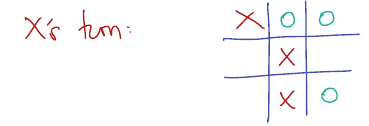

# The Game Tree

Let's formalize our set up a bit more. Imagine you're playing a 2 player game, and there is some score that you're trying to maximize and your opponent is trying to minimize. In tic tac toe, the score could be 0 if you tie 1 if you win and -1 if your opponent wins.

**Question:** If we see that the game is currently in the state state above, who is going to win? or is it going to be a tie? How can we figure this out?



One way we can figure this out is to consider all the possible moves for red. This process is called expanding the game tree. We see that there are then 3 possible games states that follow this one. 

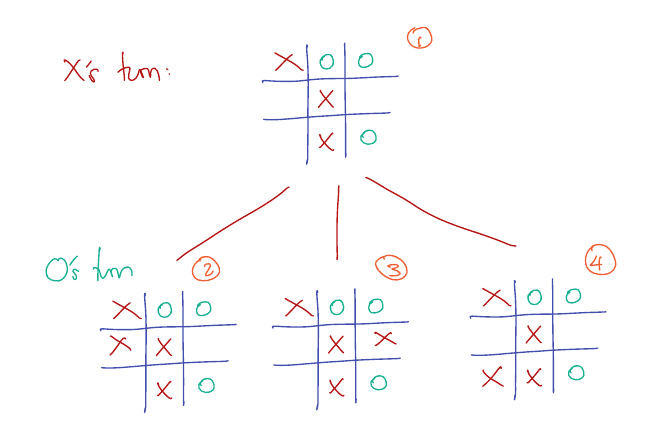

Now we can ask the question, who is going to win for these 3 hypothetical states? To compute this we can further expand the game tree. Here it is fully expanded

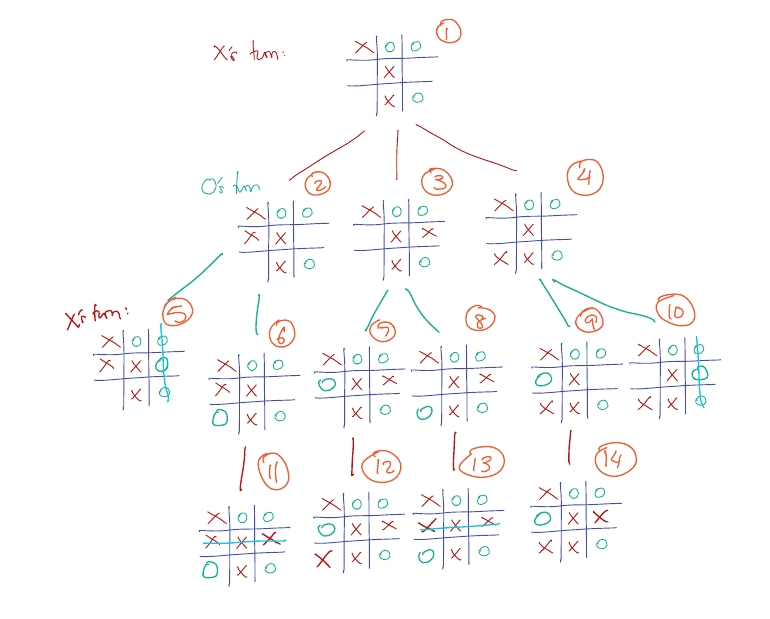


The tree is fully expanded when all the hypothetical games have reached a conclusion - either red has won, green has won or they have tied. These ending nodes are called leaves of the game tree. 


For clarity, we're going to replace the leaves with a blue X, O or T corresponeding to the winner of the game (or tie)

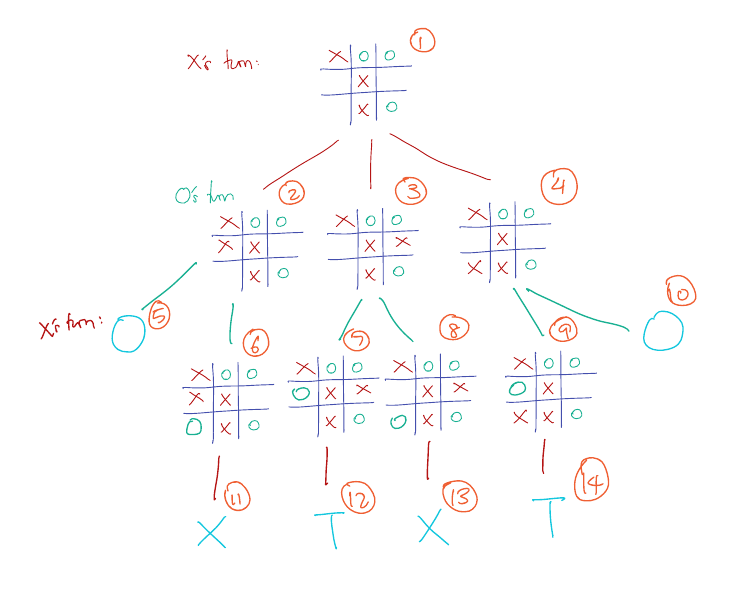


This is our full game tree. 

**Questions**:
* What is the result of the game if we reach state 7 (red wins, green wins or tie) ?
* What is the result of the game if we reach state 8 (red wins, green wins or tie) ?
* What is the result of the game if we reach state 4 (red wins, green wins or tie) ?
* What is the result of the game if we reach state 3 (red wins, green wins or tie) ?
* What is the result of the game if we reach state 1 (red wins, green wins or tie) ?


**Claim**: If I have the game tree for a game then I can figure out the best move! Why? Convince me!

Taking the previous diagram, we can 'push up' the results from the leaf nodes.

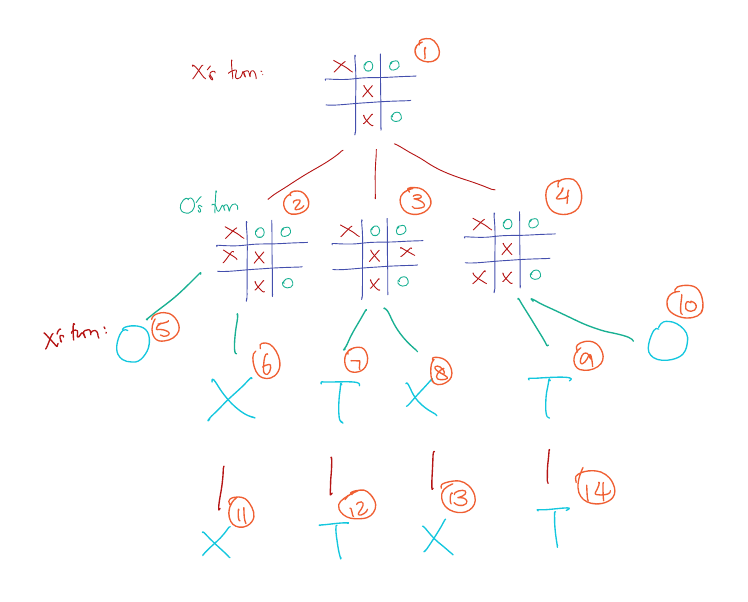


If we reach state 2, it's green's turn, and it sees that there are two possible outcomes corresponding to their options. Which one should it take, and so what is the value of state 2?

We can continue to 'push' up the values all the way to the top in the way

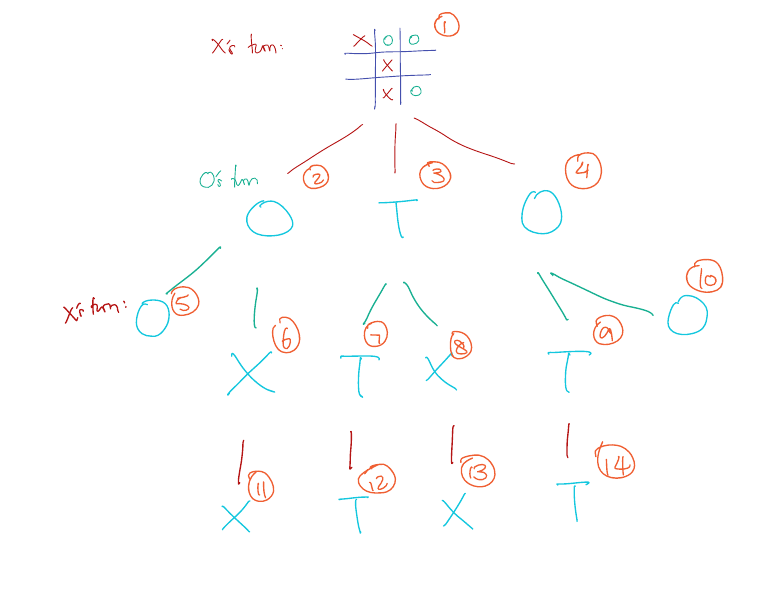

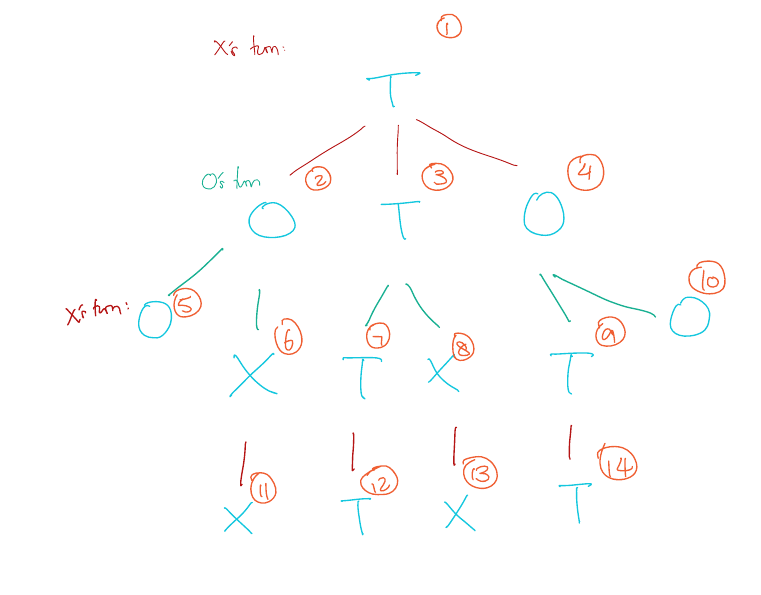


**Question**: Why is it called a game tree?

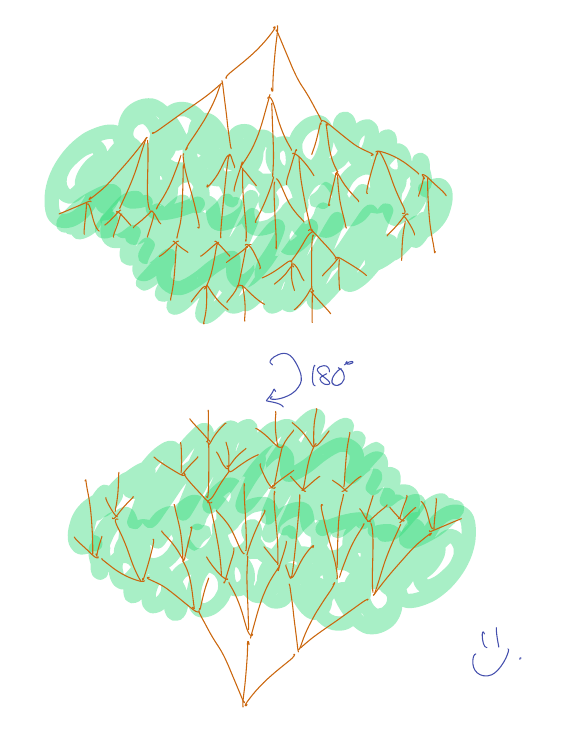

In [6]:
#@title Run for answer
Image(filename='imgs/11.png') 

# Minimax 

In general, we allow for multiple outcomes of the game instead of just win/lose/tie -- red can win by a lot or lose by a little. Because we're considering zero sum games, we can represent the outcome of the game as an integer. It is highly positive if red wins by a lot (which means green losses by a lot), and slightly negative if green wins by a little (or red losses by a little). 

In the case of the previous example, the outcome of X winning is 1, T is 0 and O winning is -1.

The **value** of a game state is the outcome of the game if both players play optimally. For example, the value of state 1 in the previous example is 0, and the value of state 6 is 1.

The minimax algorithm finds the value of the game in exactly the way we just did!
* Start by fully expanding the game tree to get the outcomes of all possible games
* Then push up the values all the way:
    * If it's red's turn, the value of a node is the maximum of the value of its children
    * If it's green's turn, the value of a node is the minimum of the value of its children


**Question:** Why is this algorithm called minimax?

**Excercise:** Use this algorithm to find the value of the top node.

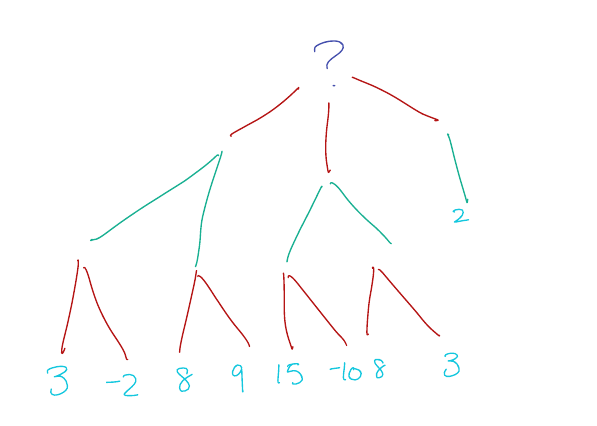

    
    
    


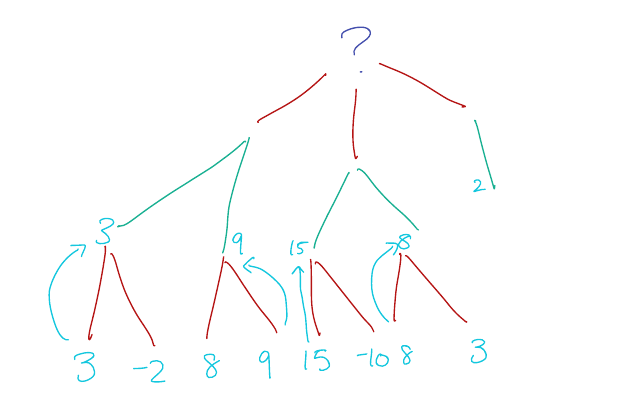

In [7]:
#@title Run to see first step
Image(filename='imgs/8.png') 

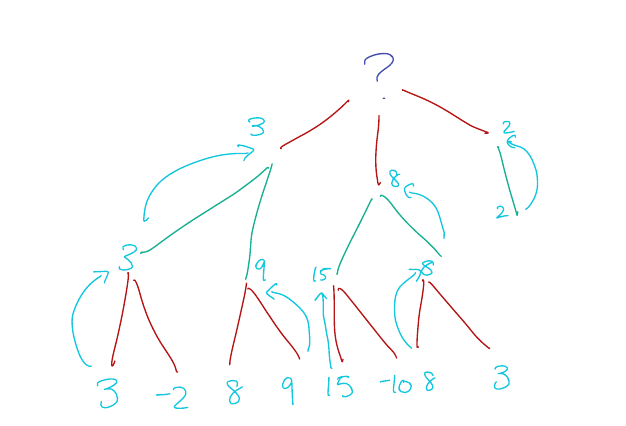

In [8]:
#@title Run to see next step
Image(filename='imgs/9.png') 

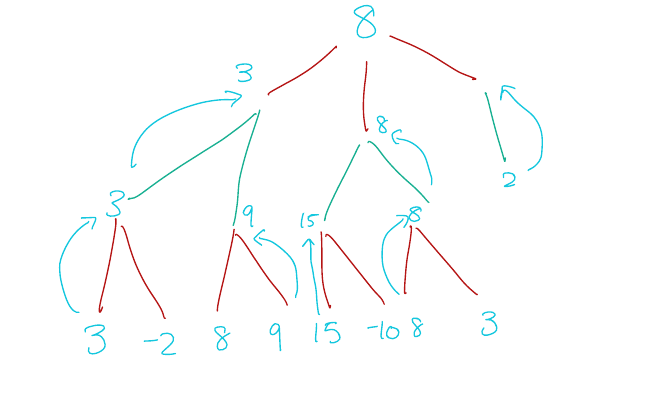

In [9]:
#@title Run to see final step
Image(filename='imgs/10.png') 

# A (very optional) aside on recursion

Don't worry, we'll get back to the games in just a bit :)

Recursion is one of my favorite things. It's all about finding self-similar structures in problems.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/8/80/SierpinskiTriangle.svg/220px-SierpinskiTriangle.svg.png)



**Exercise:** Write a function that retuns the sum of the first $n$ numbers. i.e. sum_first_n(n) should return $1+2+3...+n$

In [18]:
def sum first_n(n):
  ### BEGIN CODE ##
  pass # remove me and implement the function!
  ### END CODE #####
  

SyntaxError: ignored

In [19]:
#@title **Example:** Double click to see some example implementations! How does each one work?
def sum_first_n_counter(n):
    counter = 0
    for i in range(1, n+1):
        counter += i
    return counter

def sum_first_n_python(n):
    return sum([i for i in range(1, n+1)])

def sum_first_n_explicit(n):
    return n*(n+1)//2 # CHALLENGE: prove this ;) 

test_n = 10 # Change me and run to convince yourself that these functions are equivalent!

print(sum_first_n_python(test_n))
print(sum_first_n_counter(test_n))
print(sum_first_n_explicit(test_n))

55
55
55


**Question:** How about this one?

In [20]:
def sum_first_n_recursive(n):
    if n == 1: return 1
    else: return sum_first_n_recursive(n-1) + n

test_n = 20 # Change me and run to convince yourself that these functions are equivalent!
print(sum_first_n_python(test_n))
print(sum_first_n_counter(test_n))
print(sum_first_n_explicit(test_n))
print(sum_first_n_recursive(test_n))


210
210
210
210


**What's going on here??** A function, calling itself from within itself!?! If at first this seems unnatural and wrong, that's totally normal! We'll try to convince you that this actually makes total sense. The key is that solving a smaller version of the exact same problem lets us solve the bigger problem easily!

Indeed the task of adding up the numbers from 1 to n is just the same as adding up the numbers from 1 to (n-1) and adding n. In math that looks like

$$ 1 + 2 + 3 + ... + n = (1 + 2 + 3 + ... + (n-1)) + n $$

or using sum notation 

$$ \sum_{i=1}^n i = (\sum_{i=1}^{n-1}i) + n$$

and finally in code: `sum_first(n) = sum_first(n-1) + n` Which makes sense! 

Note that there is one special case when there is only one number - what is the sum of the first 1 numbers? This can't be broken down further to a smaller sum because there's just one number! This edge case is called the **base case** of the recursion, and in this case well define the sum of the numbers from 1 to 1 just to be 1. 

Notice in the recursive implementation that we didn't even to use any for loops to write this! Pretty cool huh? How is the following recursive?
* Product of the first n numbers

**Exercise: Implement recursive version of the function**

In [21]:
def product_iterative(n):
    counter = 1
    for i in range(1, n+1):
        counter *= i
    return counter

def product_recursive(n):
    ## BEGIN CODE ##
    ## END CODE ##

test_n = 5
print(product_recursive(test_n))
print(product_iterative(test_n))

IndentationError: ignored

Cool, so some problems have this property that solving a different instance of the same problem helps us solve the bigger problem, so what? 

**Exercise:** What does the following code do?

In [23]:
def mystery(n):
    if n < 3: return 1
    a = 1
    b = 1
    for i in range(3, n+1):
        c = a + b
        b = a 
        a = c
    return a

That was a pretty challenging exercise. Turns out this function computes the $n$th number in the sequence starting with 1, 1 and continually add up the last two numbers. This is also known as the Fibonacci sequence and the first couple of numbers are 1, 1, 2, 3, 5, 8, 13, 21, 34, 55,... (Convice yourself of this!). As we can see, the function that computes this above is kinda hard to parse, especially for a sequence with such a short description: "You just add up the previous two numbers in the sequence!". 

Let's check out the recursive implementation:

In [24]:
def fib_recursive(n):
    if n < 3: return 1 # the 1st and 2nd numbers of the sequence are 1
    return fib_recursive(n-1) + fib_recursive(n-2) # the nth number is the sum of the n-1th and n-2th number!


In [25]:
test_n = 12
print(mystery(test_n))
print(fib_recursive(test_n))

144
144


**Discuss:** What are some advantages of this recursive function?

**Discuss:** How is finding the value of a game state recursive? Think of  how finding the value of other game states may help you in finding the game state that you're interested in!

![](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRkn2ilFdcf4dJFUHvBU1v4S2Whpnnm-l_iwg&usqp=CAU)


# Minimax implementation

Complete the following code to implement the minimax algorithm! Read the comments in the function to see what is going on in the surrounding code and what the function should return

In [27]:
def minimax_implementation(board, player):
    """
    Arguments:
        board: is a list of lists representing the tictactoe board
        player: is the current player number (1, or 0)
    
    Returns 
        (value, move): the value of the board, and the best move for player 
    """
    if ttt.check_end(board):
        return ttt.score_simple(board), None
        # ttt.score_simple(board) returns 1 if red won, 0 if tie, and -1 if green won

    possible_moves = ttt.get_next_possible(board)
    score_moves = []
    for m in possible_moves:
        value = minimax_implementation(ttt.step(board, m, player), ttt.swap(player))[0]
        # value is the value of the game state if I used move m
    
        ### BEGIN CODE ####
        # populate score_moves with tuples (value, m) corresponding to the
        # value of the game state that we end up in after taking move m
        score_moves.append((value, m))

        ### END CODE ####
    ### BEGIN CODE ####
    # Use the max / min functions to return the best move depending on the player
    # You can check the current player using is_red_player(player)
    # Remember that the red player wants to maximize and the other player wants
    # to minimize
    if is_red_player(player):
      return max(score_moves)
    else:
      return min(score_moves)
    ### END CODE #### 


**Exercise:** Ask your instructors questions about the above function!

**Exercise:** Test your implementation on a game! Play around with changing the `game_state` variable to see if it finds the correct value of the game! It's currently set to the same example we were working with ealier

In [28]:
game_state= [['x','o','o']
            ,[ 0 ,'x', 0]
            ,[ 0 ,'x','o']]
value, best_move = minimax_implementation(game_state, RED_PLAYER)
ttt.print_board(game_state)
print(f"Value of the game: {value}")
print(f"Best move: {best_move}")

x	o	o	
-	x	-	
-	x	o	
Value of the game: 0
Best move: (1, 2)


Now that you know how it works, play a couple of games against the AI :)

In [ ]:
ttt.ttt(ttt.human_player, ttt.minimax_player)

## Problems with minimax
The game tree for tic tac toe has at most $9! = 9 \times 8 \times 7\times 6 \times 5 \times 4 \times 3 \times 2 \times 1$ leaf nodes because there are 9 choices for the first move, then for each of these there are 8 remaining possible moves, and then 7 and so on. $9! = 362880$ which is within our computers capabilities. 

**Question**: About how many leaves of the game tree are there for Connect 4? (played on a 7x7 grid) if you play 20 turns? How about 30?

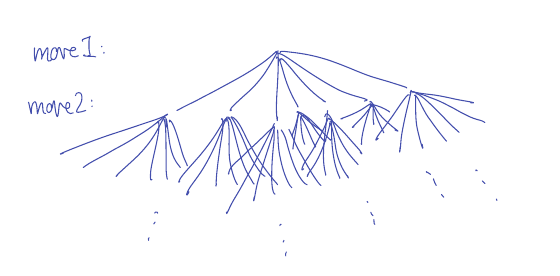

The game tree gets REALLY BIG, REALLY FAST. So sadly, the minimax algorithm is usually very slow. There are some variants that help address this:

* [Alpha beta pruning](https://en.wikipedia.org/wiki/Alpha-beta_pruning) - Chops up parts of the tree that are not used.
* Truncated minimax - Don't fully expand the game tree. Partially expand the game tree and 'score' the leaves (which are not terminal) using some function, and use the score as a stand in for the outcome of the game. 
* [Monte-Carlo Tree Search](https://en.wikipedia.org/wiki/Monte_Carlo_tree_search) - Randomly selects paths through the game tree to estimate the outcome 
* [Alpha-Go](https://en.wikipedia.org/wiki/AlphaGo) - Monte-Carlo Tree Search using a neural networks to estimate the value of the game.

Today we'll dive into more detail on truncated minimax.

## Truncated minimax

To address the intractibility of this algorithm, truncated minimax explores part of the game tree and then estimates the outcome of the game using a scoring function (instead of getting the actual result). The picture looks something like this 

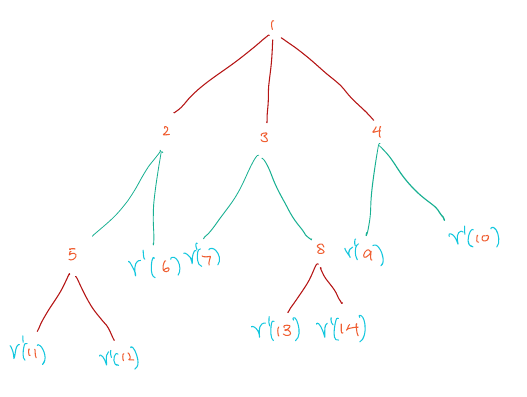

Here we explored the game tree, and our leaves are no longer terminal game states. Instead, we're using a scoring function $V'$ that estimates the outcome. 

Let's check out how this is implemented:

```
# depth is the number of steps forward to look.

def minimax_with_truncation(board, depth, player, score_fn):
    if depth == 0 or check_end(board):
        return score_fn(board, depth), []
    
    possible_moves = get_next_possible(board)
    score_moves = []
    for m in possible_moves:
        value = minimax_with_truncation(ttt.step(board, m, player), depth-1, ttt.swap(player). score_fn)[0]
        score_moves.append((value, m))
    if is_red_player(player):
        return max(score_moves, key=lambda x: x[0])
    else:
        return min(score_moves, key=lambda x: x[0])

```

**Exercise:** Compare this to regular minimax. What are the differences?

## Scoring function

The scoring function is responsible for estimating the value of a game state. Note that because it is called for each leaf node in our game tree, it needs to run fast. If it were to run slower, we would need to truncate earlier in order for the player to make a move in a reasonable amount of time.

One simple example from chess might be to say that the score of a certain board is the total of red's piece values minus the total of green's piece values.

**Question:** How would you design a scoring function for Connect 4? Remember, we want the score to be positive if the board is good for red and negative if the board is good for green.


### Baseline

Here's a baseline scoring function that we'll give you to give you some ideas on how to design your own.

Here are some notes about the baseline scoring function:
* Note that `c4.check_end(board)` returns 1 on a win for red, 2 on a win for green, and 3 on a tie. 
* depth is larger when near the top of the game tree (yes this is unintuitive). Thus returning 10000 + depth means that winning faster is preferable to winning slower. Similarly -10000 - depth is saying we'd rather lose slow than fast.
* get_lines(board) returns a list of 'lines' in the board. This includes the rows, and columns and diagonals of the board as a list of lists.
* the c4.count_sublist(lines, sublist) function counts the number of times sublist occurs in lines
* A space on the board that is not occupied is represented using None
* `score += (200 + depth) * c4.count_sublist(lines, [None, "x", "x", "x", None])` is saying that each occurence of x x x with unoccupied spaces on either side adds 200 + depth to the score.

**Exercise:** Ask your instructor a quesiton about the code!

**Exercise:** Improve upon the baseline to get a better player! Try to make the best one possible, and we'll duel them later!

Ideas: 
* Try to also reward other desirable subsequences
* Try tuning the relative weights i.e. why 200 + depth for None x x x None instead of say 500 + depth?

In [29]:
def custom_score(board, depth):
    if c4.check_end(board) == 1:
        return 10000 + depth
    if c4.check_end(board) == 2:
        return -10000 - depth
    lines = c4.get_lines(board)
    score = 0
    score += (200 + depth) * c4.count_sublist(lines, [None, "x", "x", "x", None])
    score -= (200 + depth) * c4.count_sublist(lines, [None, "o", "o", "o", None])
    # TODO: Fine tune the score function by adding and subtracting 
    
    return score

In [16]:
#@title Run to play against your minimax agent!
minimax_player = c4.get_minimax_player(custom_score)
c4.c4(c4.human_player, minimax_player)

Player 0 is x's and Player 1 is o's

Good luck!! 

-   -   -   -   -   -   -   

-   -   -   -   -   -   -   

-   -   -   -   -   -   -   

-   -   -   -   -   -   -   

-   -   -   -   -   -   -   

-   -   -   -   -   -   -   

-   -   -   -   -   -   -   

0   1   2   3   4   5   6   
It is Player 0's turn


NameError: ignored

In [30]:
#@title Challenge Harry's best score function, your player is x (player 0) and Harry's is o (player 1):
minimax_player = c4.get_minimax_player(custom_score)
minimax_player2 = c4.get_minimax_player(c4.preset_score)

c4.c4(minimax_player, minimax_player2)

-   -   -   -   -   -   -   

-   -   -   -   -   -   -   

-   -   -   -   -   -   -   

-   -   -   -   -   -   -   

-   -   -   -   -   -   -   

x   -   -   -   -   -   -   

x   -   -   o   -   -   -   

0   1   2   3   4   5   6   
It is Player 1's turn



KeyboardInterrupt



0
## Play against a classmate

In [31]:
def custom_score2(board, depth):
    # TODO copy another student's score function here!!
    pass
minimax_player = c4.get_minimax_player(custom_score)
minimax_player2 = c4.get_minimax_player(custom_score2)

c4.c4(minimax_player, minimax_player2)

-   -   -   -   -   -   -   

-   -   -   -   -   -   -   

-   -   -   -   -   -   -   

-   -   -   -   -   -   -   

-   -   -   -   -   -   -   

-   -   -   -   -   -   -   

x   -   -   -   -   -   -   

0   1   2   3   4   5   6   
It is Player 1's turn


TypeError: ignored

# Conclusion
Today we saw how AI game play two player, zero-sum games using the minimax algorithm as well as some variants. The game tree and minimax are fundamental concepts in game playing AI, and many more complicated algorithms can be seen as extensions of these ideas! 

If you found this interesting, check out some more game playing AI!
* Documentary about [Alpha Go](https://www.youtube.com/watch?v=WXuK6gekU1Y)
* Description of a newer model [MuZero](https://deepmind.com/blog/article/muzero-mastering-go-chess-shogi-and-atari-without-rules)
* [AI plays mario](https://m.youtube.com/watch?v=qv6UVOQ0F440)
* [AI plays poker](https://www.youtube.com/watch?v=BDF528wSKl8)

## Acknowledgements
* Notebook created by Harry Sha (harryshahai@gmail.com)